### 1. Presentación

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot, grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

In [129]:
#Creamos el dataframe de Real Estate y lo mostramos
df_RE=pd.read_csv("../data/RealEstate_Sales_2001-2020.csv")
df_RE

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family,1
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,6/24/2020,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family,1
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family,0
997210,190129,2019,4/27/2020,Windsor Locks,19 HATHAWAY ST,121450,210000.0,0.578300,Single Family,Single Family,1
997211,190504,2019,6/3/2020,Middletown,8 BYSTREK DR,203360,280000.0,0.726300,Single Family,Single Family,1


In [130]:
# Antes de empezar, realizamos una copia de DF y lo guardamos como backup en un DF distinto
df_RE_backup=df_RE.copy()

In [131]:
# Revisamos el DF y vemos que no hay nulos además de los tipos de cada variable
df_RE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997213 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     997213 non-null  object 
 9   Residential Type  997213 non-null  object 
 10  Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.7+ MB


In [132]:
# Reasignamos la variable Date Recorded a datetime y ordenamos el DF
df_RE["Date Recorded"]=pd.to_datetime(df_RE["Date Recorded"])
df_RE.sort_values(by="Date Recorded",inplace=True)

### 2. Revisión y limpieza

In [133]:
# Buscamos registros duplicados y vemos que no hay:
duplicados=df_RE.duplicated()
df_RE[duplicados]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold


#### Serial Number

In [134]:
# El Serial Number debería ser un indicador único para cada transacción pero vemos que hay muchas repeticiones de algunos de ellos.
df_RE["Serial Number"].value_counts()

Serial Number
10010      172
10018      172
10002      172
10003      171
10029      171
          ... 
1500885      1
1500887      1
1500884      1
1500888      1
208123       1
Name: count, Length: 83537, dtype: int64

In [135]:
# Comprobamos cuántos indicadores repetidos hay y son muchos. Así que investigamos más.
df_RE.loc[df_RE["Serial Number"].duplicated()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
109930,10002,2001,2001-10-01,New Britain,195 MANSFIELD AVE,85260,137500.0,0.620073,Nan,Nan,0
70789,10003,2001,2001-10-01,Berlin,2528 CHAMBERLAIN HWY,82800,130000.0,0.636923,Nan,Nan,0
96260,10001,2001,2001-10-01,Coventry,144 BUENA VISTA RD,55860,100000.0,0.558600,Nan,Nan,0
91590,10002,2001,2001-10-01,East Windsor,361 RYE ST,70570,150000.0,0.470467,Nan,Nan,0
86330,10005,2001,2001-10-01,Cheshire,81 MAYVIEW AVE,79470,150000.0,0.529800,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
59233,200354,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1
12356,200228,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1
38896,20712,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1
5020,20000043,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1


In [136]:
# Comprobamos que los indicadores repetidos no corresponden con la misma transacción (10003)
df_RE.loc[df_RE["Serial Number"]==10003]	

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
76429,10003,2001,2001-10-01,Avon,26 OAKENGATE LN,287990,455000.0,0.632945,Nan,Nan,0
70789,10003,2001,2001-10-01,Berlin,2528 CHAMBERLAIN HWY,82800,130000.0,0.636923,Nan,Nan,0
122165,10003,2001,2001-10-01,North Haven,90 CULVER LN,118440,211000.0,0.561327,Nan,Nan,0
80091,10003,2001,2001-10-01,Brooklyn,250 HERRICK RD,73670,127900.0,0.575997,Nan,Nan,0
84005,10003,2001,2001-10-01,Burlington,24 DANIEL TRACE,326620,485000.0,0.673443,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
546107,10003,2010,2010-11-16,Eastford,ASHFORD RD,55200,40000.0,1.380000,Nan,Nan,0
582996,10003,2010,2010-11-16,Hampton,259 SO BIGELOW RD,302090,355000.0,0.850958,Single Family,Single Family,0
67439,10003,2010,2010-11-30,Hartland,PELL RD,80330,125900.0,0.638046,Nan,Nan,0
590703,10003,2010,2010-12-14,Chaplin,63 CHAPPELL ST,117900,150000.0,0.786000,Single Family,Single Family,0


In [137]:
# Comprobamos que los indicadores repetidos no corresponden con la misma transacción (10003)
df_RE.loc[df_RE["Serial Number"]==2000807]	

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
47544,2000807,2020,2021-01-15,Stamford,93 GLENBROOK ROAD #102,122160,72000000.0,0.0016,Residential,Condo,1
46420,2000807,2020,2021-09-30,Naugatuck,226 MAPLE ST,211660,370000.0,0.5720,Apartments,Nan,1


In [138]:
# Dado que la columna Serial Number no aporta información verídica, la eliminamos.
df_RE.drop("Serial Number",axis=1,inplace=True)
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
857911,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.491400,Condo,Condo,-18
878446,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16
882211,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16
389700,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5
430204,2006,2001-09-05,Newington,48 EVERGREEN RD,166110,256000.0,0.648867,Single Family,Single Family,-5
...,...,...,...,...,...,...,...,...,...,...
59233,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1
12356,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1
38896,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1
5020,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1


#### List Year

In [139]:
# Revisamos los valores de la columna List Year y a priori no parece haber nada raro.
df_RE["List Year"].value_counts()

List Year
2004    84056
2020    66592
2003    64239
2005    61602
2002    59682
2001    59584
2019    58954
2018    50709
2016    49773
2014    49563
2006    48785
2015    46651
2017    45691
2009    42508
2013    39943
2012    35973
2007    35617
2010    33491
2008    32735
2011    31065
Name: count, dtype: int64

#### Date Recorded y Recorded Year

In [140]:
# A partir de la columna Date Recorded vamos a crear una nueva columna extrayendo solo el año de dicha fecha.
df_RE["Recorded Year"] = df_RE["Date Recorded"].dt.year
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
857911,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.491400,Condo,Condo,-18,1999
878446,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16,2001
882211,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16,2001
389700,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5,2001
430204,2006,2001-09-05,Newington,48 EVERGREEN RD,166110,256000.0,0.648867,Single Family,Single Family,-5,2001
...,...,...,...,...,...,...,...,...,...,...,...
59233,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1,2021
12356,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1,2021
38896,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1,2021
5020,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1,2021


In [141]:
# El estudio se centrará en las transacciones realizadas entre 2001 y 2020 así que eliminamos registros previos/posteriores a esos años.
df_RE.drop(df_RE[df_RE["Recorded Year"] == 0].index, inplace=True)

In [142]:
# Analizando los valores de la nueva columna vemos que hay años anteriores y posteriores al periodo a analizar (2001-2020).
# Además hay un registro de 1999 cuando los de la columna List Year empiezan posteriormente. Resulta extraño y lo analizaremos con Years until sold.
df_RE["Recorded Year"].value_counts()

Recorded Year
2005    79566
2004    73943
2020    62534
2002    60207
2006    57250
2003    56319
2019    52622
2015    48894
2017    48493
2021    48441
2016    47611
2018    47165
2007    46138
2014    41941
2010    39128
2013    37513
2009    36305
2008    34195
2012    32568
2011    32088
2001    14291
1999        1
Name: count, dtype: int64

In [143]:
# Eliminamos los registros de las transacciones realizadas anterior o posteriormente a 2001 y 2020.
df_RE.drop(df_RE[df_RE["Recorded Year"] == 1999].index, inplace=True)
df_RE.drop(df_RE[df_RE["Recorded Year"] == 2021].index, inplace=True)

#### Years until sold

In [144]:
# Nos centramos en la columna Years until sold y buscamos los registros cuya fecha de venta es anterior a la fecha de "publicación".
df_RE[df_RE["Years until sold"]<0]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
878446,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16,2001
882211,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16,2001
389700,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5,2001
430204,2006,2001-09-05,Newington,48 EVERGREEN RD,166110,256000.0,0.648867,Single Family,Single Family,-5,2001
410449,2006,2001-09-25,Naugatuck,217 OSBORN RD,183850,293711.0,0.625955,Single Family,Single Family,-5,2001
420097,2006,2001-10-27,Greenwich,1010 NORTH ST,573930,660000.0,0.869591,Single Family,Single Family,-5,2001
407732,2006,2003-07-17,Naugatuck,80 GORMAN ST,84200,158900.0,0.529893,Single Family,Single Family,-3,2003
388498,2006,2004-02-26,Sharon,DOUGLAS RD,3600,5020.0,0.717131,Nan,Nan,-2,2004
414000,2006,2004-06-05,Bristol,225 TYLER WAY,147320,329900.0,0.446560,Single Family,Single Family,-2,2004
443550,2006,2004-07-27,South Windsor,305 MILL POND DR,113580,210000.0,0.540857,Condo,Condo,-2,2004


In [145]:
# Dado que no hay manera de saber la fecha correcta (siendo un dato importante para el estudio) y el peso de los registros no es significativo, decidimos borrar esos registros.
df_RE.drop(df_RE[df_RE["Years until sold"]<0].index,inplace=True)

In [146]:
# Comprobamos que entre la columna de List Year y la nueva columna Recorded Year no se da este error.
df_RE.loc[df_RE["List Year"]>df_RE["Recorded Year"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year


In [147]:
# Creamos una nueva columna con los años entre el List Year y el Recorded Year para comprobar si hay más incongruencias con la columna Years until sold.
df_RE["Years for sale"]=df_RE["Recorded Year"]-df_RE["List Year"]

In [148]:
# Ambas columnas son iguales por lo que eliminamos la nueva varibale creada.
df_RE[df_RE["Years for sale"]!=df_RE["Years until sold"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Years for sale


In [149]:
# Eliminamos la nueva columna creada.
df_RE.drop("Years for sale", axis=1, inplace=True)

#### Town

In [150]:
#Listamos todos los towns del dataset. Vemos que hay alguno/s con valor Unknown.
towns=df_RE["Town"].unique()
towns

array(['Hartford', 'East Haven', 'East Windsor', 'Stafford', 'Avon',
       'Windsor Locks', 'Berlin', 'Newtown', 'New Britain', 'Middletown',
       'Coventry', 'Norwalk', 'Stamford', 'Trumbull', 'Cheshire',
       'East Hampton', 'Simsbury', 'Danbury', 'Milford', 'Windsor',
       'Old Saybrook', 'Naugatuck', 'Bristol', 'Monroe', 'Bethel',
       'Thomaston', 'Newington', 'Ashford', 'Wethersfield', 'Norwich',
       'East Granby', 'Stratford', 'North Haven', 'Weston', 'Winchester',
       'Willington', 'Orange', 'Vernon', 'West Hartford', 'Somers',
       'Bloomfield', 'New London', 'Waterford', 'Warren', 'Torrington',
       'Bridgeport', 'West Haven', 'Brooklyn', 'Suffield', 'Burlington',
       'Westport', 'Glastonbury', 'Hamden', 'Hartland', 'Guilford',
       'South Windsor', 'Plainfield', 'Clinton', 'Oxford', 'Branford',
       'Stonington', 'Redding', 'Wilton', 'Farmington', 'Mansfield',
       'Harwinton', 'Southbury', 'Cromwell', 'Watertown', 'Rocky Hill',
       'Prospect',

In [151]:
# Buscamos los registros cuyo Town es desconocido y así podemos corregirlo (por los valores de town de la misma Address y lo podemos ver también en Internet)
df_RE.loc[df_RE["Town"]=="***Unknown***"]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
444657,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007


In [152]:
#Vemos que con la misma dirección hay tres registros que hacen referencia a la misma transacción ya que tienen la misma fecha de compra y corresponden a una casa individual.
df_RE.loc[df_RE["Address"]=="18 MATHIEU LANE"]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
479214,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540,50000.0,1.330800,Nan,Nan,0,2007
444657,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007
444846,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007


In [153]:
# Al no poder determinar cual es la correcta, las eliminamos.
df_RE.drop(df_RE[df_RE["Address"] == "18 MATHIEU LANE"].index, inplace=True)

#### Address

In [154]:
# La dejamos para más tarde

#### Assessed Value y Sale Amount 

In [155]:
df_RE["Assessed Value"].dtype

dtype('int64')

In [156]:
df_RE["Sale Amount"].dtype

dtype('float64')

#### Sales Ratio

In [157]:
# Nos determina el ratio entre el precio de venta y la valoración del inmueble.
df_RE["Sales Ratio"]=df_RE["Sale Amount"]/df_RE["Assessed Value"]
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
69577,2001,2001-10-01,Hartford,131 CLARK ST,52430,40000.0,0.762922,Nan,Nan,0,2001
87483,2001,2001-10-01,East Haven,149 ATWATER ST,92620,163000.0,1.759879,Nan,Nan,0,2001
89969,2001,2001-10-01,East Windsor,31 PROSPECT HL DR,60290,99900.0,1.656991,Nan,Nan,0,2001
109944,2001,2001-10-01,Stafford,33 CHURCH ST,65310,128000.0,1.959884,Nan,Nan,0,2001
76429,2001,2001-10-01,Avon,26 OAKENGATE LN,287990,455000.0,1.579916,Nan,Nan,0,2001
...,...,...,...,...,...,...,...,...,...,...,...
7008,2020,2020-12-31,Griswold,2 MECHANIC ST,27650,10000.0,0.361664,Vacant Land,Nan,0,2020
17958,2020,2020-12-31,Goshen,127 EAST HYERDALE DRIVE,337130,520000.0,1.542432,Residential,Single Family,0,2020
56995,2020,2020-12-31,Wethersfield,33 TWO STONE DR,143180,150000.0,1.047632,Residential,Single Family,0,2020
36723,2020,2020-12-31,Stonington,15 SHERWOOD DR,156600,226000.0,1.443167,Residential,Single Family,0,2020


#### Property Type y Residential Type

In [158]:
# Analizando los valores de tipología de propiedad vemos que hay clases que seguramente se pueden categorizar dentro de otras: apartments, condos, single family, 2 family, 3 family and 4 family parecen propiedades residencial
df_RE["Property Type"].value_counts(True)

Property Type
Single Family     0.423287
Nan               0.403113
Condo             0.111102
Two Family        0.027833
Residential       0.017681
Three Family      0.013265
Four Family       0.002266
Vacant Land       0.000825
Commercial        0.000475
Apartments        0.000093
Industrial        0.000057
Public Utility    0.000001
Name: proportion, dtype: float64

In [159]:
# Analizando los valores de la tipología de viviendas residenciales vemos que efectivamente podrían incluirse dentro de esa categoría.
df_RE.groupby("Property Type")["Residential Type"].value_counts()

Property Type   Residential Type
Apartments      Nan                     88
Commercial      Nan                    451
Condo           Condo               105404
Four Family     Four Family           2150
Industrial      Nan                     54
Nan             Nan                 382439
Public Utility  Nan                      1
Residential     Single Family        12435
                Condo                 3122
                Two Family             787
                Three Family           370
                Four Family             60
Single Family   Single Family       401578
Three Family    Three Family         12585
Two Family      Two Family           26406
Vacant Land     Nan                    783
Name: count, dtype: int64

In [160]:
# Los apartamentos vamos a asignarlos a la tipología residencial.
df_RE.loc[df_RE["Property Type"]=="Apartments","Residential Type"]="Apartments"

In [161]:
# Categorizamos como propiedad residencial todos los que lo son.
df_RE.loc[df_RE["Residential Type"]=="Apartments","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Condo","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Single Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Two Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Three Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Four Family","Property Type"]="Residential"

In [162]:
# Comprobamos la categorización
df_RE.groupby("Property Type")["Residential Type"].value_counts()

Property Type   Residential Type
Commercial      Nan                    451
Industrial      Nan                     54
Nan             Nan                 382439
Public Utility  Nan                      1
Residential     Single Family       414013
                Condo               108526
                Two Family           27193
                Three Family         12955
                Four Family           2210
                Apartments              88
Vacant Land     Nan                    783
Name: count, dtype: int64

In [163]:
#Vemos que hay una gran cantidad, el 40% del DF sin detallar el tipo de propiedad.
df_RE["Property Type"].value_counts(True)

Property Type
Residential       0.595528
Nan               0.403113
Vacant Land       0.000825
Commercial        0.000475
Industrial        0.000057
Public Utility    0.000001
Name: proportion, dtype: float64

In [164]:
# Creamos un DF con las propiedades sin categorizar y vemos que del 2001 al 2006 hay una gran catidad de inmuebles sin categoría.
df_RE_Nan=df_RE.loc[df_RE["Property Type"]=="Nan"].copy()

In [165]:
df_RE_Nan["Recorded Year"].value_counts()

Recorded Year
2005    79563
2004    73935
2002    60207
2003    56318
2006    46273
2001    14285
2007     5181
2019     4274
2018     4080
2015     3953
2016     3929
2017     3883
2014     3829
2008     3446
2010     3413
2020     3395
2013     3290
2011     3196
2012     3141
2009     2848
Name: count, dtype: int64

In [166]:
# Creamos un DF con las propiedades categorizadas y vemos que del 2001 al 2005 no hay ningún inmueble y en 2006 hay aprox. 11K vs. 2007 41K (aprox.) sin categoría.
df_RE_NoNan=df_RE.loc[df_RE["Property Type"]!="Nan"].copy()

In [167]:
df_RE_NoNan["Recorded Year"].value_counts()

Recorded Year
2020    59139
2019    48348
2015    44934
2017    44607
2016    43675
2018    43085
2007    40954
2014    38107
2010    35712
2013    34222
2009    33457
2008    30745
2012    29426
2011    28886
2006    10977
Name: count, dtype: int64

In [168]:
# Esta situación nos lleva a pensar que en 2006 se empezaron a categorizar los inmuebles objeto de transacción pero que hasta el momento su categoría no venía informada. ¿Es un tema del DF o a nivel nacional no se tiene ese dato?
# Dada la falta de información en años previos al 2006 no podemos prescindir de ninguna categoría.

In [169]:
# Añadimos una columna que permita saber si la transacción as anterior a 2007 o no. Será una variable Binaria.
df_RE["Before 2007"] = ["Yes" if year < 2007 else "No" for year in df_total["Recorded Year"]]
df_RE

ValueError: Length of values (927099) does not match length of index (948713)

#### Address

In [ ]:
# Buscamos registros con la misma fecha de venta + town + address + precio de venta para verificar duplicados y quedarnos solo con el primer registro.
duplicados_cuatro_columnas = df_RE[df_RE.duplicated(subset=["Date Recorded", "Town", "Address", "Sale Amount"], keep="first")]
duplicados_cuatro_columnas

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
74313,2001,2001-10-01,Berlin,44 RESERVOIR RD,89360,30000.0,0.335721,Nan,Nan,0,2001
79863,2001,2001-10-01,Bethel,5 ELIZABETH ST,122860,19600.0,0.159531,Nan,Nan,0,2001
92010,2001,2001-10-01,Bethel,5 ELIZABETH ST,122860,19600.0,0.159531,Nan,Nan,0,2001
79570,2001,2001-10-01,Bethel,5 ELIZABETH ST,122860,19600.0,0.159531,Nan,Nan,0,2001
69398,2001,2001-10-01,Bristol,47 SYLVIA LN,65010,40500.0,0.622981,Nan,Nan,0,2001
...,...,...,...,...,...,...,...,...,...,...,...
36496,2020,2020-12-24,Newtown,155 & 141 GREAT QUARTER ROAD,250180,91750.0,0.366736,Residential,Single Family,0,2020
48665,2020,2020-12-24,Newtown,155 & 141 GREAT QUARTER ROAD,250180,91750.0,0.366736,Residential,Single Family,0,2020
55997,2020,2020-12-28,Westbrook,310 GROVE BEACH RD N,317800,225000.0,0.707992,Commercial,Nan,0,2020
52184,2020,2020-12-30,Windsor Locks,2 JACKSON ST,112350,33000.0,0.293725,Residential,Single Family,0,2020


In [ ]:
df_RE.drop(duplicados_cuatro_columnas.index, inplace=True)

In [ ]:
# Buscamos registros con la misma fecha de venta + town + address para verificar duplicados y eiminarlos al no poder determinar el precio de venta correcto.
duplicados_tres_columnas = df_RE[df_RE.duplicated(subset=["Date Recorded", "Town", "Address"], keep=False)]
duplicados_tres_columnas

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
86329,2001,2001-10-01,East Hampton,MULTI ADDRESSES,84950,135000.0,1.589170,Nan,Nan,0,2001
90707,2001,2001-10-01,Bethel,5 ELIZABETH ST,122860,19600.0,0.159531,Nan,Nan,0,2001
88432,2001,2001-10-01,Berlin,44 RESERVOIR RD,89360,30000.0,0.335721,Nan,Nan,0,2001
82779,2001,2001-10-01,Bethel,5 ELIZABETH ST,122860,21000.0,0.170926,Nan,Nan,0,2001
92556,2001,2001-10-01,East Hampton,MULTI ADDRESSES,76560,119900.0,1.566092,Nan,Nan,0,2001
...,...,...,...,...,...,...,...,...,...,...,...
13383,2020,2020-12-30,Bristol,41 BETHEL ST,111860,21667.0,0.193697,Residential,Single Family,0,2020
50030,2020,2020-12-30,New Haven,277 FORBES AV,117670,32500.0,0.276196,Residential,Two Family,0,2020
42812,2020,2020-12-30,New Haven,277 FORBES AV,117670,97500.0,0.828588,Residential,Two Family,0,2020
8089,2020,2020-12-30,Bristol,41 BETHEL ST,111860,108333.0,0.968470,Residential,Single Family,0,2020


In [ ]:
df_RE.drop(duplicados_tres_columnas.index, inplace=True)

In [ ]:
# Tras eliminar los registros duplicados, la cardinalidad de la dirección es de casi un 73% lo que tiene sentido contando que el DF abarca 20 años.
df_RE["Address"].nunique()/len(df_RE)

0.7370313202797112

In [ ]:
len(df_RE)

927099

## Fusionado de tablas (tipo interés / inflación / desempleo)

In [ ]:
df_Rates=pd.read_excel("../data/Rates_2001-2021.xlsx")
df_Rates

,Fecha,Tipo de interés,Inflación,Desempleo
0,2001-01-01,0.065,0.028262,0.04730
1,2001-01-02,0.065,0.028262,0.04730
2,2001-01-03,0.060,0.028262,0.04730
3,2001-01-04,0.060,0.028262,0.04730
4,2001-01-05,0.060,0.028262,0.04730
...,...,...,...,...
7666,2021-12-28,0.000,0.046979,0.05350
7667,2021-12-29,0.000,0.046979,0.05350
7668,2021-12-30,0.000,0.046979,0.05350
7669,2021-12-31,0.000,0.046979,0.05350


In [ ]:
df_total=pd.merge(df_RE,df_Rates,how="left", left_on="Date Recorded", right_on="Fecha")

In [ ]:
df_total.head(5)

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Fecha,Tipo de interés,Inflación,Desempleo,Before 2007
0,2001,2001-10-01,Hartford,131 CLARK ST,52430,40000.0,0.762922,Nan,Nan,0,2001,2001-10-01,0.03,0.028262,0.0473,Yes
1,2001,2001-10-01,East Haven,149 ATWATER ST,92620,163000.0,1.759879,Nan,Nan,0,2001,2001-10-01,0.03,0.028262,0.0473,Yes
2,2001,2001-10-01,East Windsor,31 PROSPECT HL DR,60290,99900.0,1.656991,Nan,Nan,0,2001,2001-10-01,0.03,0.028262,0.0473,Yes
3,2001,2001-10-01,Stafford,33 CHURCH ST,65310,128000.0,1.959884,Nan,Nan,0,2001,2001-10-01,0.03,0.028262,0.0473,Yes
4,2001,2001-10-01,Avon,26 OAKENGATE LN,287990,455000.0,1.579916,Nan,Nan,0,2001,2001-10-01,0.03,0.028262,0.0473,Yes


| Columna          | Descripción |
| ---------------- | ----------- |
| List Year        | Año de publicación |
| Date Redorded    | Fecha de venta |
| Town             | Población |
| Address          | Dirección |
| Assesssed value  | Valoración |
| Sale Amount      | Precio de venta |
| Sales ratio      | Precio venta/Valoración |
| Property Type    | Tipo de propiedad |
| Residential Type | Tipo de propiedad (sólo residenciales) |
| Years until sold | Años transcurridos entre publicación y venta |
| Recorded year    | Año de venta |
| Tipo de interés  | Interés marcado por la Reserva Federal |
| Inflación        | Inflación respecto al año anterior  |
| Desempleo        | Población en paro respecto a la población en edad de trabajar  |
| Before 2007      | Indica si la transacción se realiza antes del 2007  |

In [171]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] > umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] > umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [170]:
card_tipo(df_total)

,Card,%_Card,Tipo,tipo_sugerido
List Year,20,0.002157,int64,Numerica discreta
Date Recorded,6154,0.663791,datetime64[ns],Numerica discreta
Town,169,0.018229,object,Numerica discreta
Address,683301,73.703132,object,Numerica continua
Assessed Value,88272,9.521313,int64,Numerica discreta
Sale Amount,53467,5.76713,float64,Numerica discreta
Sales Ratio,606379,65.406068,float64,Numerica continua
Property Type,6,0.000647,object,Categorica
Residential Type,7,0.000755,object,Categorica
Years until sold,5,0.000539,int64,Categorica


In [ ]:
categoricas = ["Property Type","Residential Type"]
numericas = ["List Year","Sale Amount","Sales Ratio","Recorded Year","Tipo de interés","Inflación","Desempleo"]

## Análisis

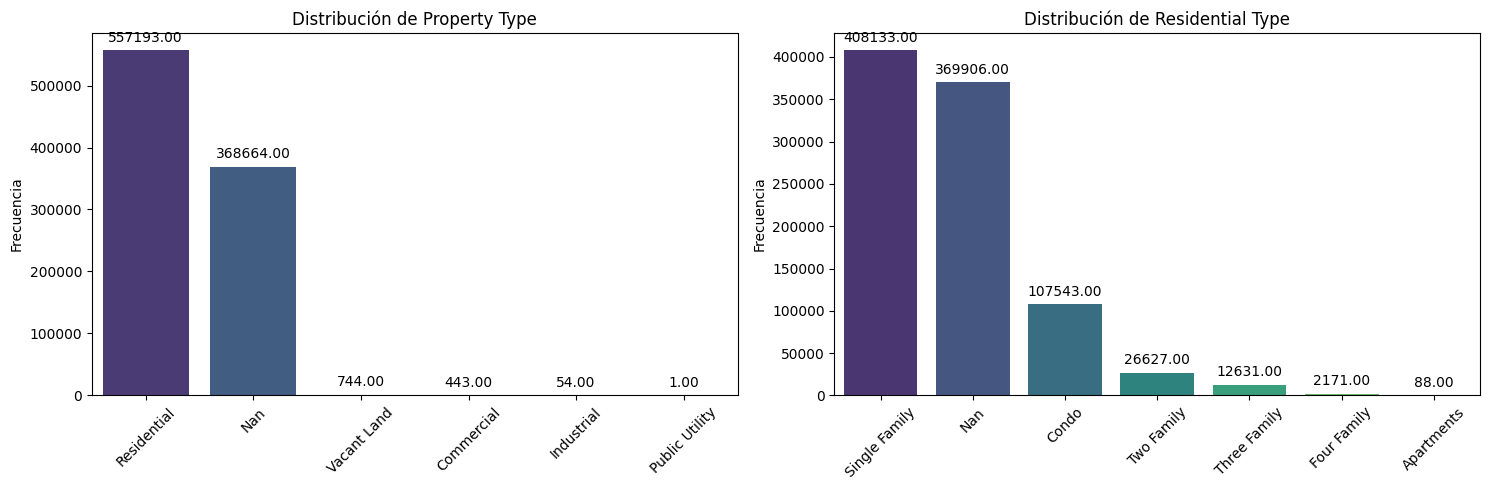

In [ ]:
# El 60% de las transacciones corresponden a inmuebles residenciales, especialmente significativas son las transacciones de de los 
pinta_distribucion_categoricas(df_total, categoricas, mostrar_valores= True)

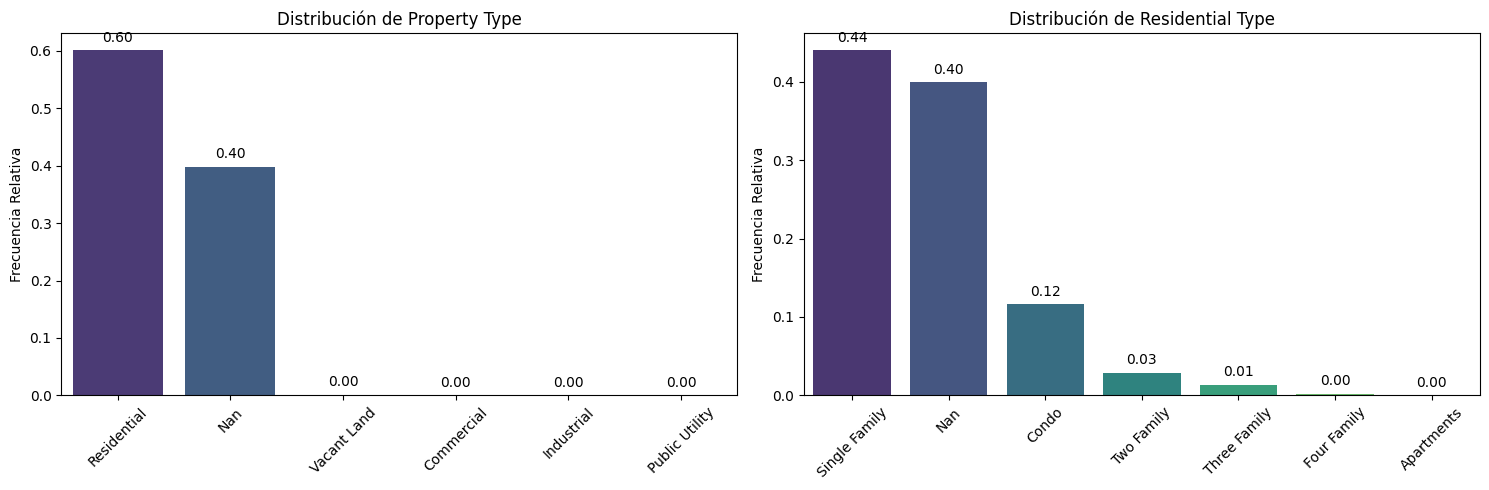

In [ ]:
pinta_distribucion_categoricas(df_total, categoricas, mostrar_valores= True, relativa = True)

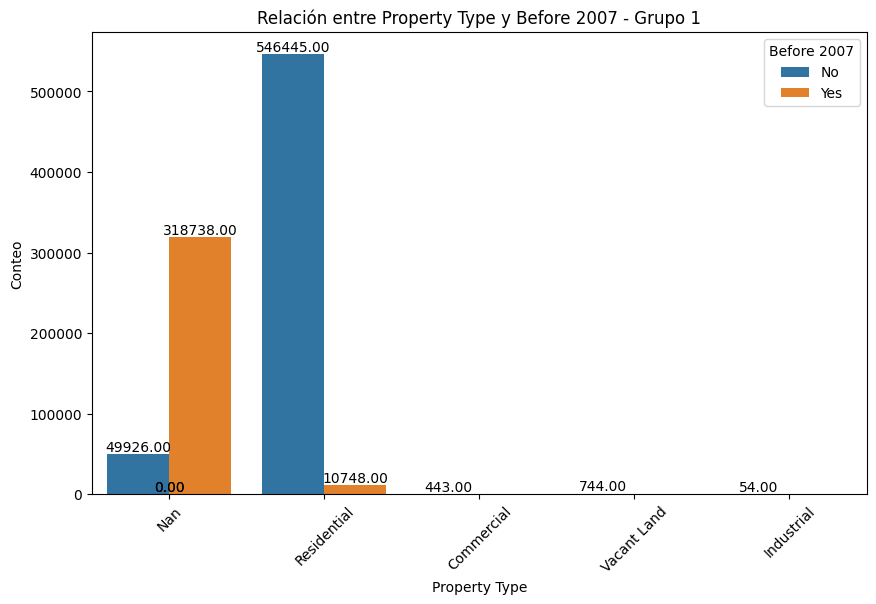

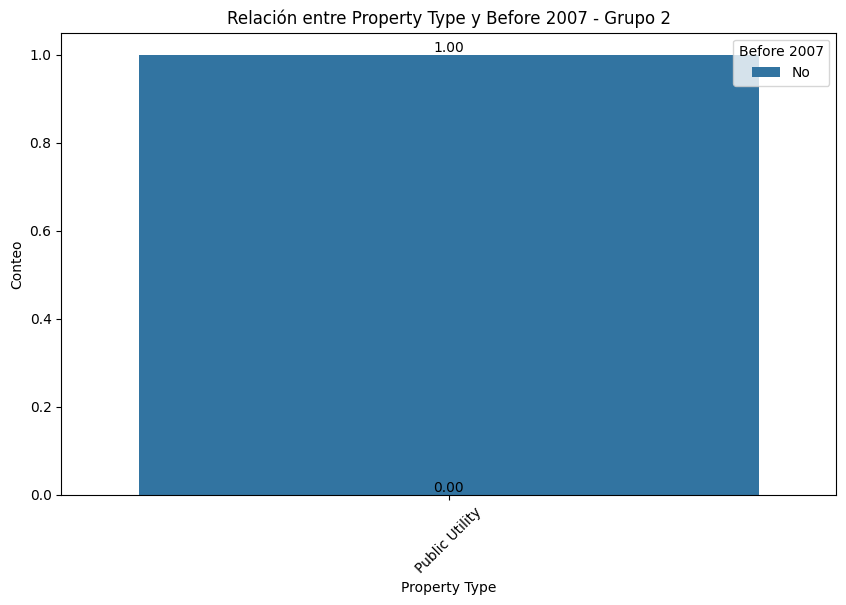

In [ ]:
plot_categorical_relationship_fin(df_total, "Property Type","Before 2007", show_values= True)

(2,)


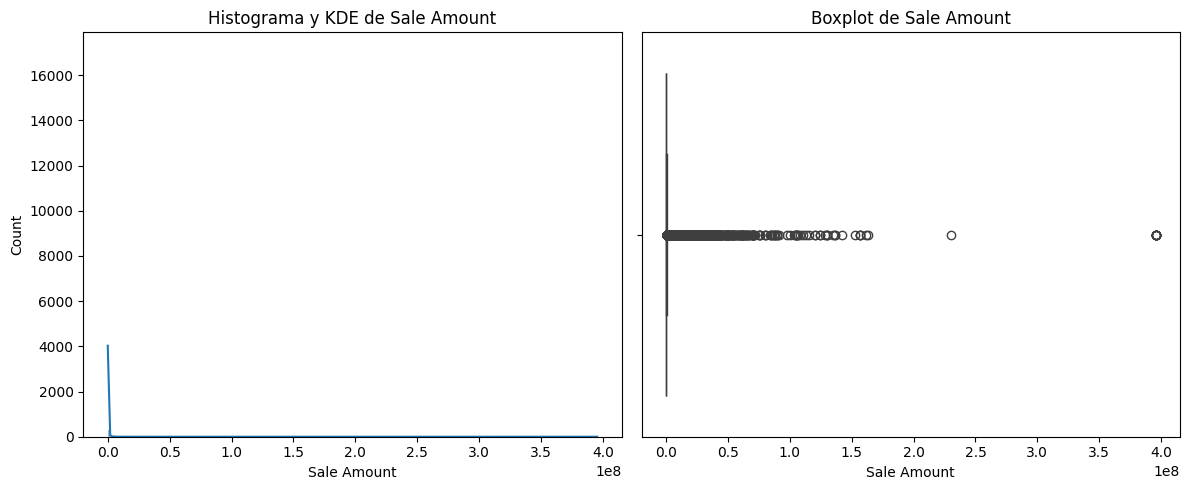

In [ ]:
plot_combined_graphs(df_total,["Sale Amount"])